In [17]:
#1. Data Overview

# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('structured_bank_data.csv')
print(df)


       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [16]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))

#Observations:
#The dataset contains 1,114 records with 21 features

#The target variable is "y" (whether the client subscribed to a term deposit)

#Most features are categorical (job, marital status, education, etc.)

#Some numerical features include age, duration, campaign, etc.

#No missing values in the dataset (all columns have 1,114 non-null entries)

Dataset shape: (41188, 21)

First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.

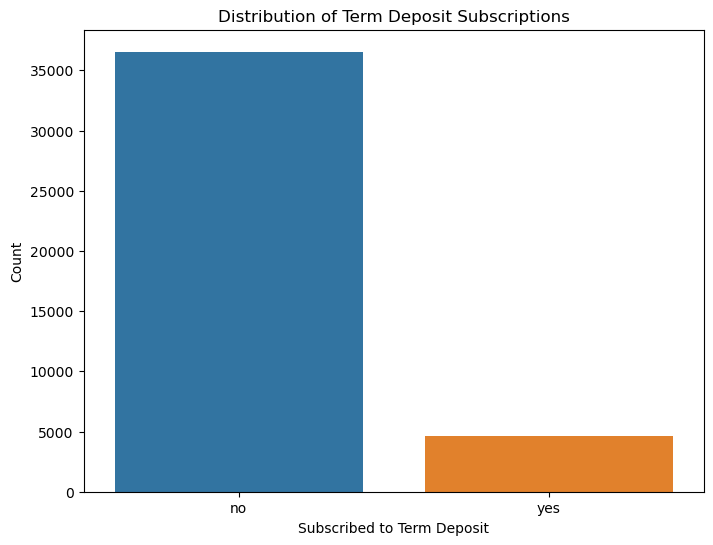


Target variable distribution:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [11]:
#2. Exploratory Data Analysis
#2.1 Target Variable Distribution

# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# Percentage distribution
print("\nTarget variable distribution:")
print(df['y'].value_counts(normalize=True) * 100)

#Observations:
#The dataset is highly imbalanced with only about 5.3% positive cases (subscribed to term deposit)

#This imbalance will need to be addressed if we build predictive models

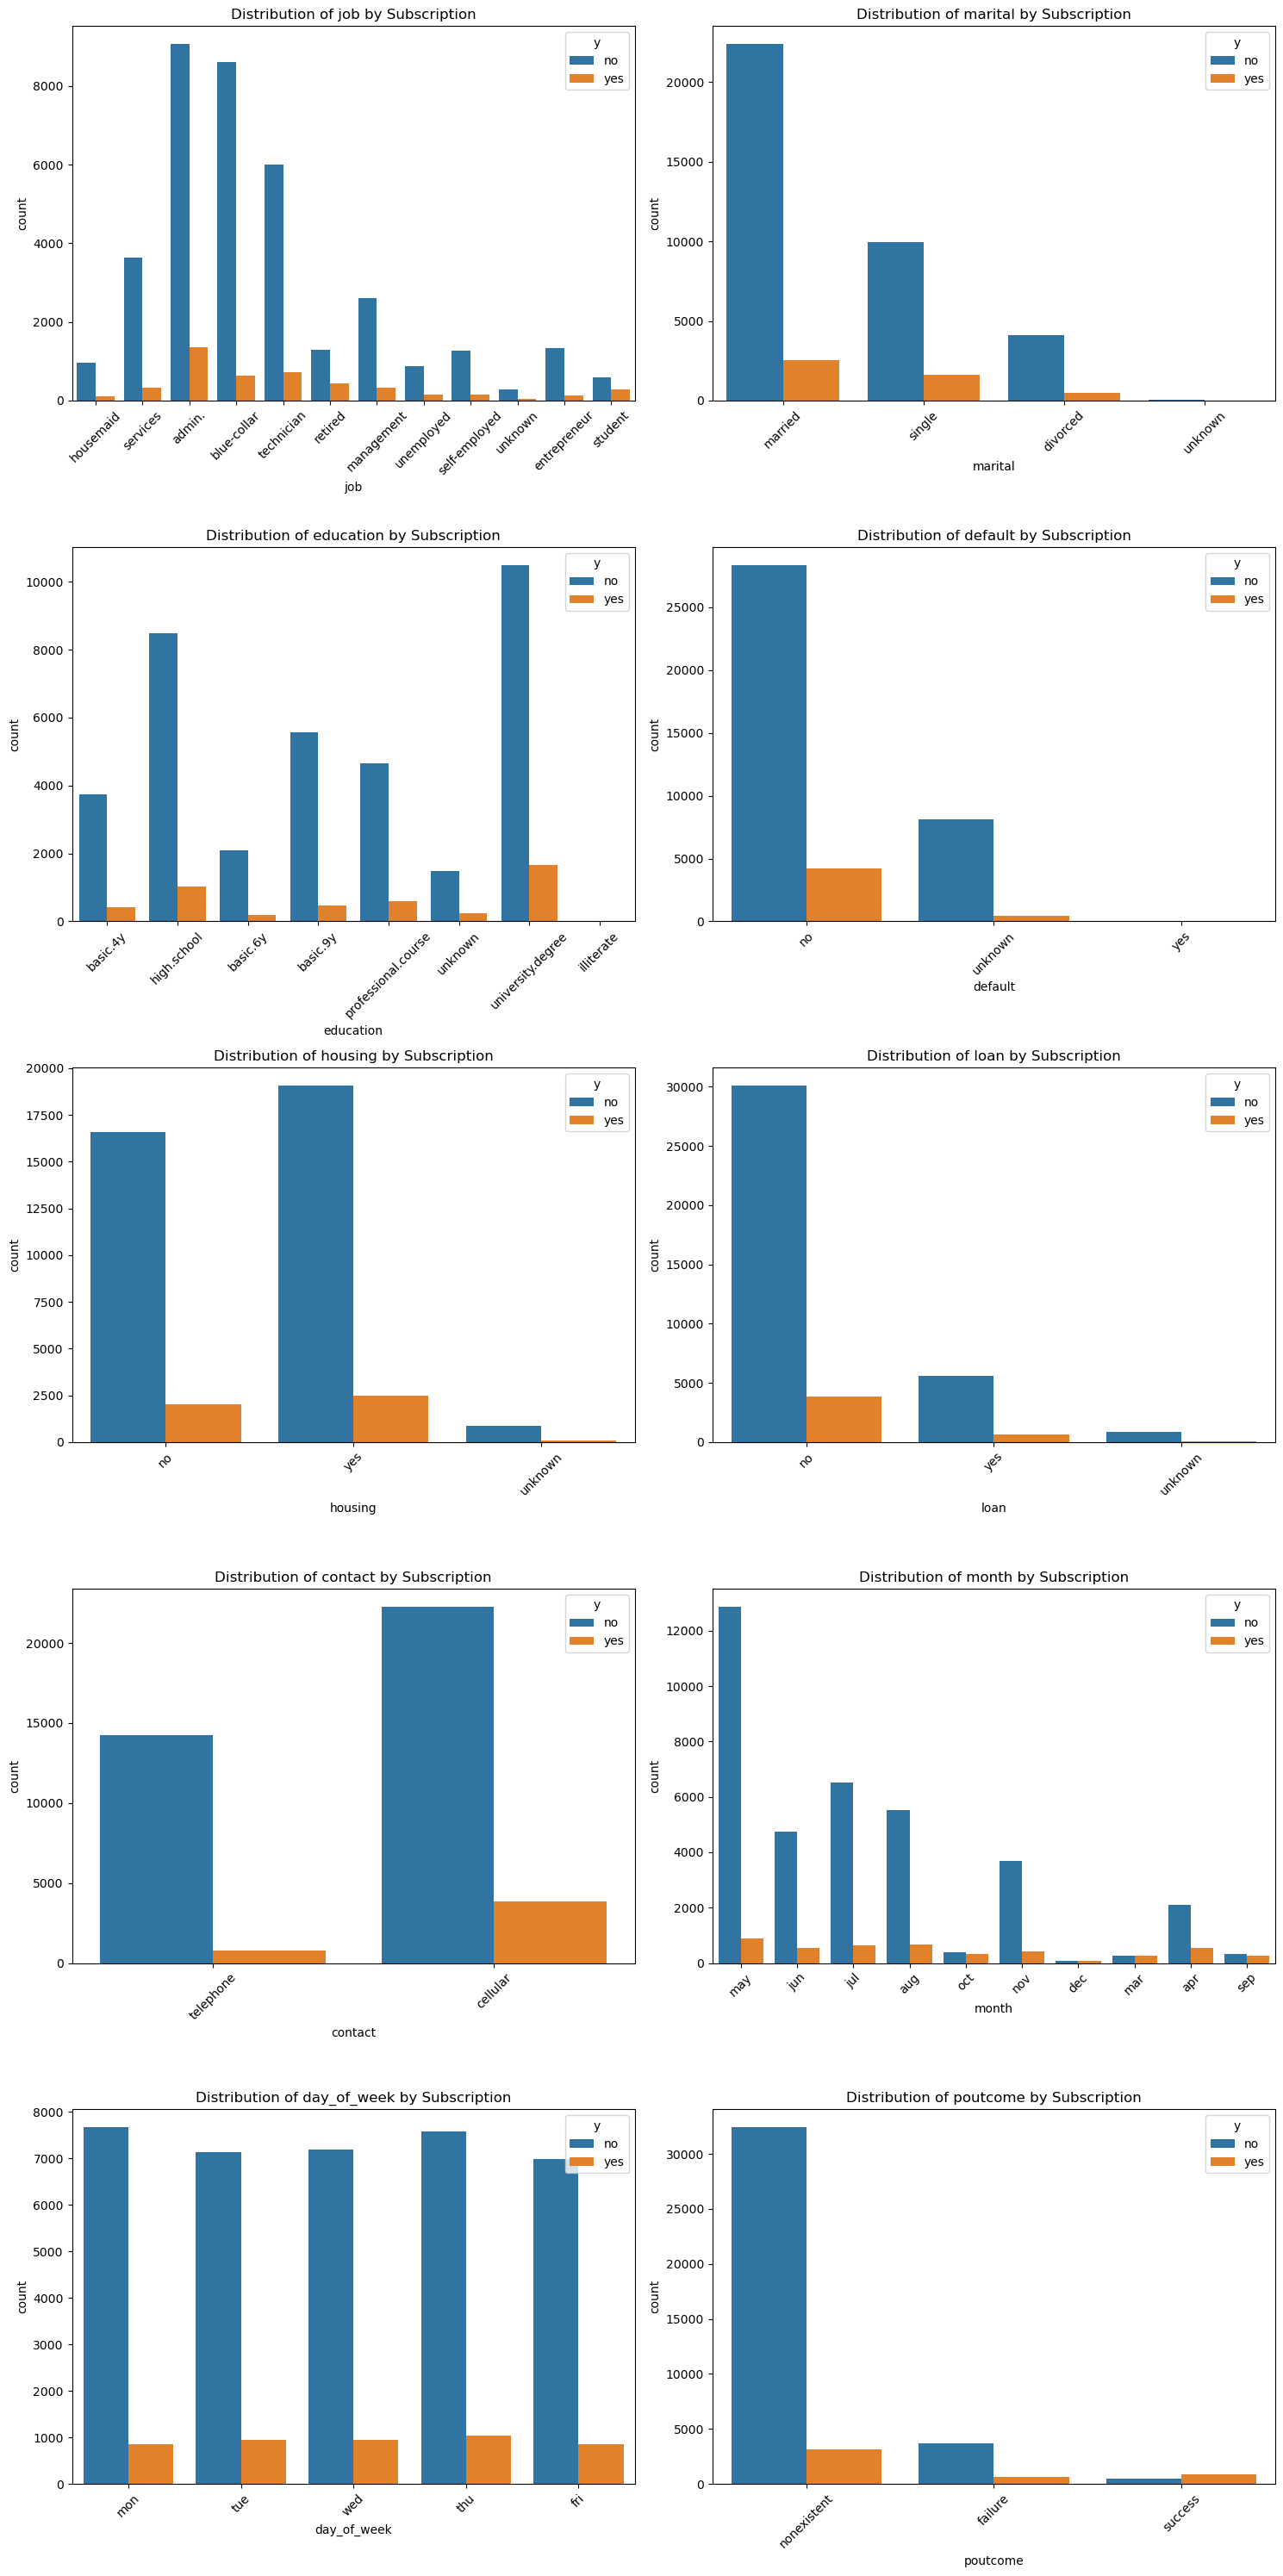

In [12]:
#2.2 Categorical Features Analysis

# Analyze categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

plt.figure(figsize=(15, 30))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'Distribution of {col} by Subscription')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Key Findings:
#Job: Blue-collar workers are most common but have low subscription rates. Students and retired have higher rates.

#Marital Status: Married individuals dominate the dataset but have lower subscription rates than singles.

#Education: Clients with university degrees have higher subscription rates.

#Default: Most clients don't have credit in default.

#Housing/Loan: Clients with housing loans are more common but have slightly lower subscription rates.

#Contact: Most contacts are via telephone.

#Month: Most calls were made in May.

#Day of Week: Weekdays are fairly evenly distributed.

#Poutcome: Most previous outcomes are "nonexistent" (no previous contact).

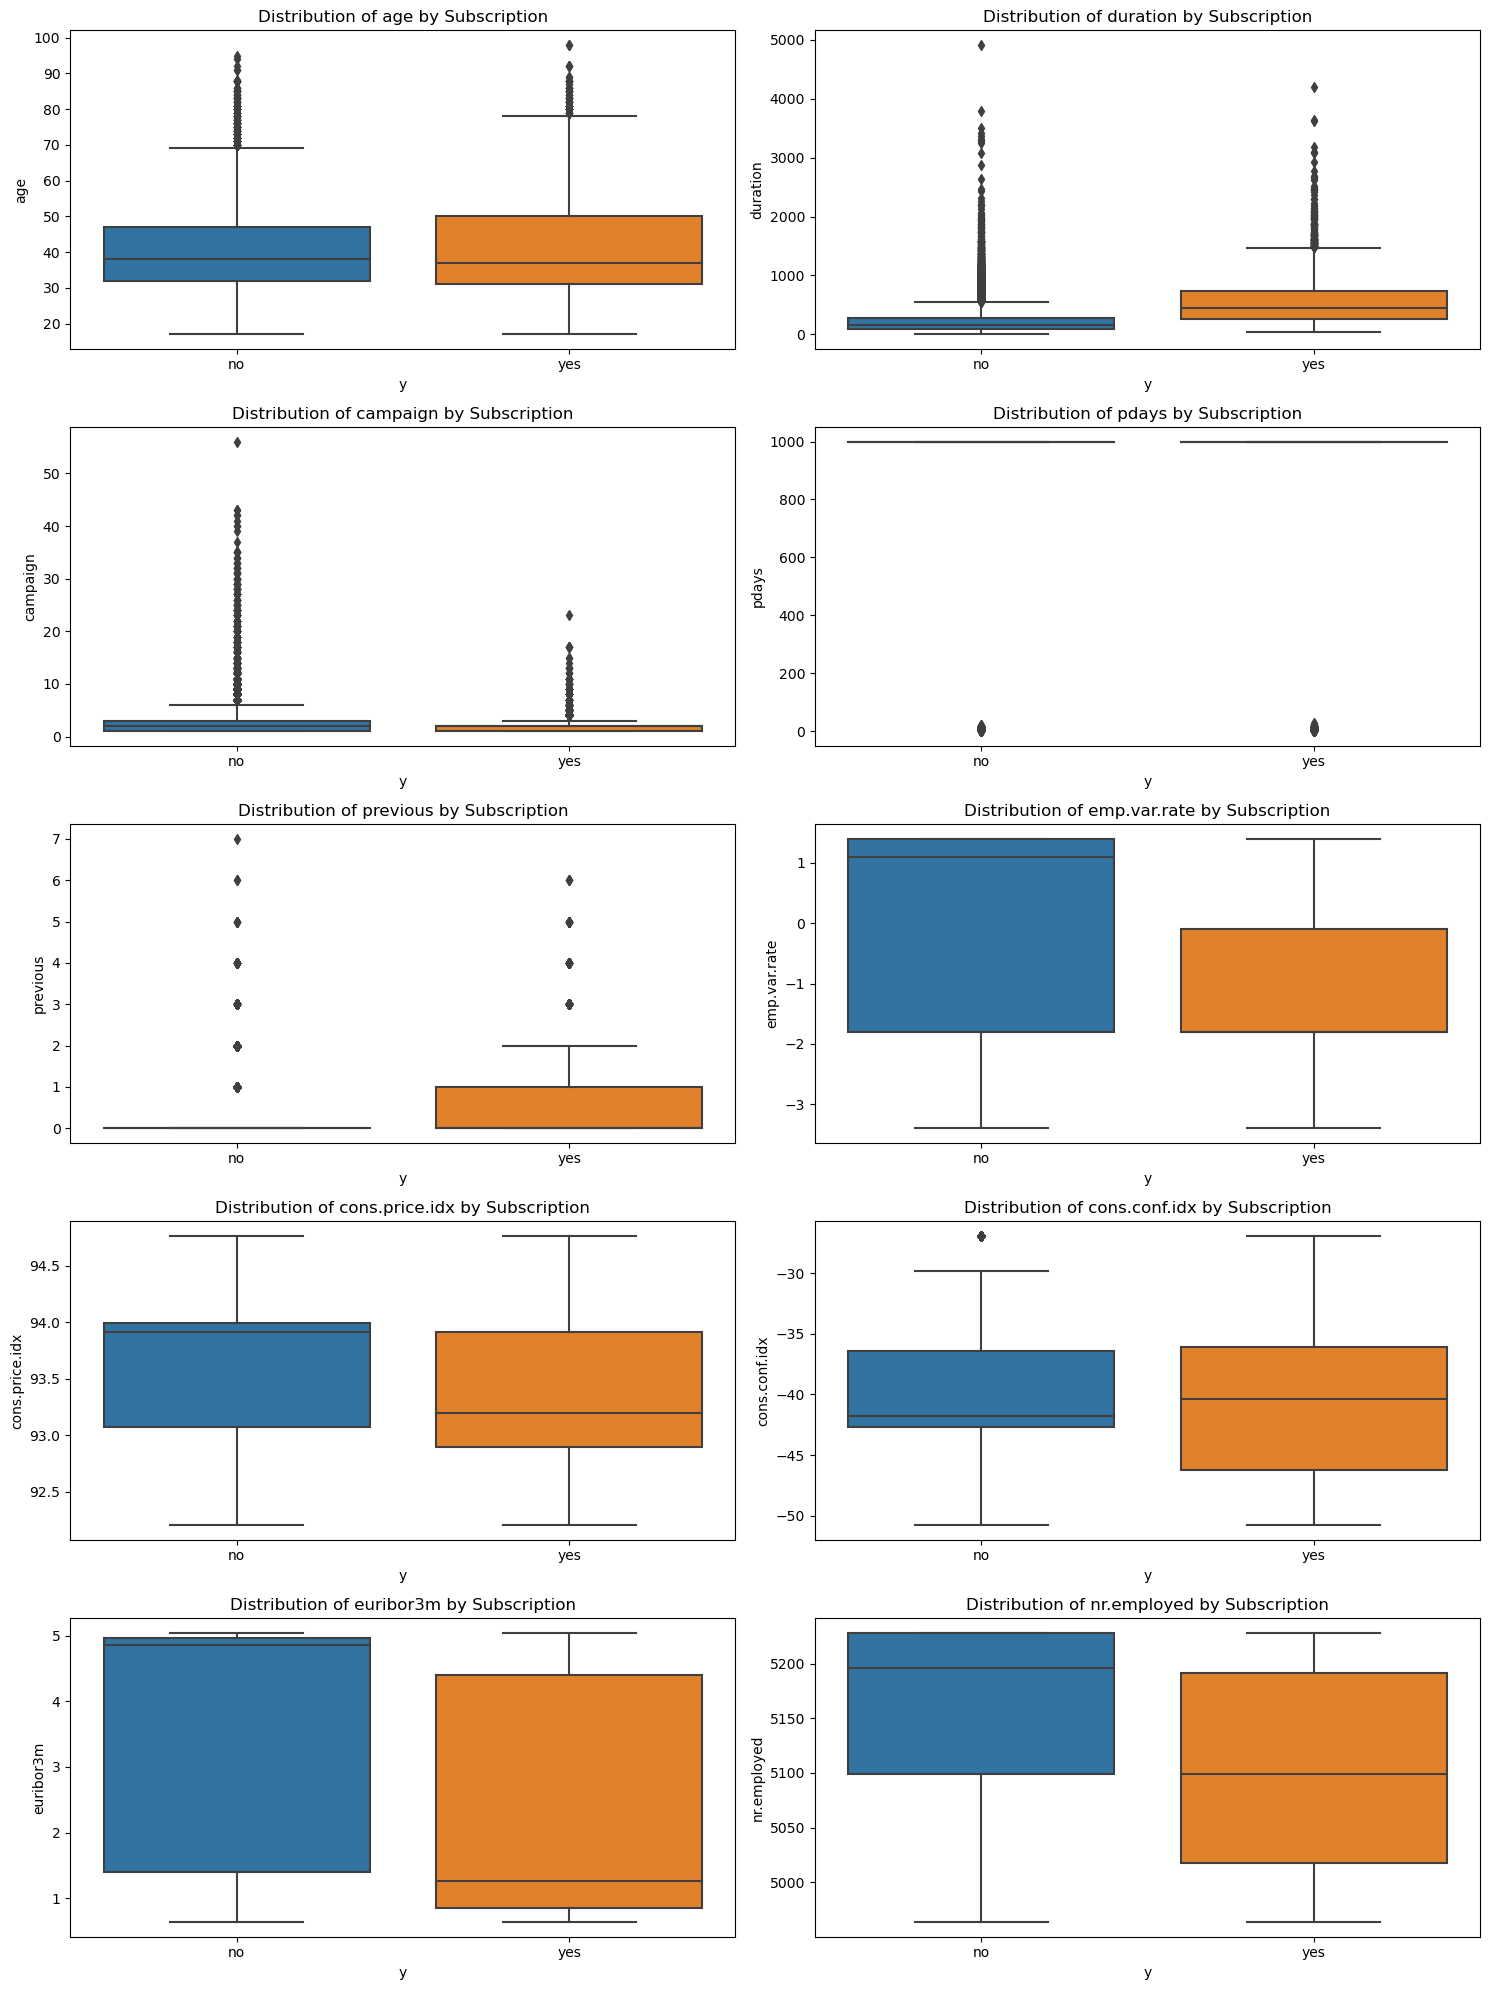

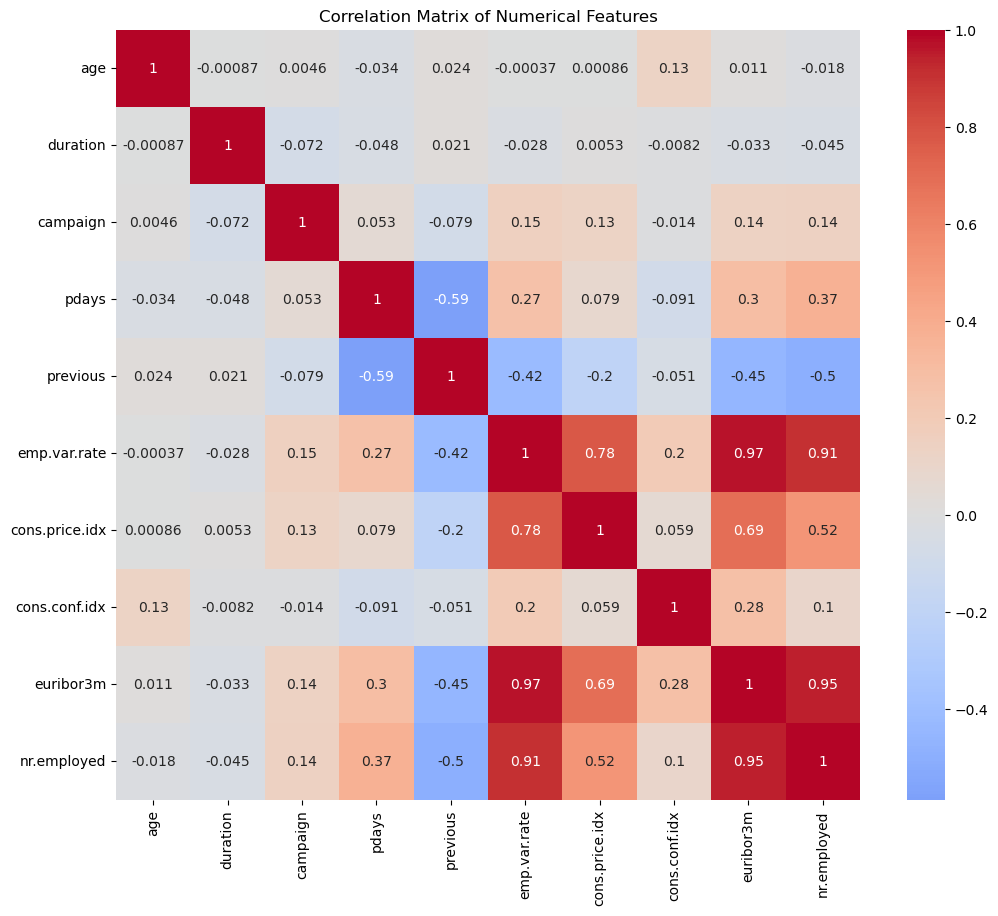

In [13]:
#2.3 Numerical Features Analysis

# Analyze numerical features
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'Distribution of {col} by Subscription')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Key Findings:

#Age: Younger clients tend to subscribe more, though the difference isn't dramatic.

#Duration: Longer call durations correlate strongly with subscriptions.

#Campaign: Fewer contacts during this campaign correlate with higher subscription rates.

#Pdays: Most values are 999 (client not previously contacted).

#Economic Indicators: Several economic indicators show differences between subscribed and non-subscribed groups.

C:\softwares\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


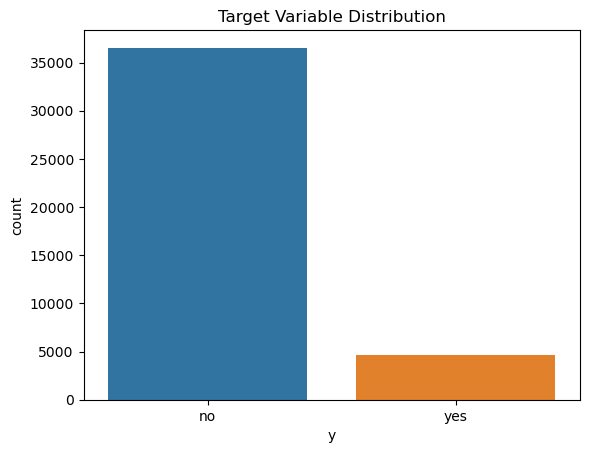

In [1]:
#Data Preprocessing & Exploration

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("structured_bank_data.csv")

# Visualize class balance
sns.countplot(data=df, x='y')
plt.title('Target Variable Distribution')
plt.show()


In [2]:
#Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'y':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [3]:
#Handle Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('y', axis=1)
y = df_encoded['y'].map({'no': 0, 'yes': 1})

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [5]:
# Convert to NumPy arrays to avoid compatibility issues (especially for KNN)
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()


In [8]:
#Model Training and Evaluation
#We'll use Random Forest, XGBoost, Naive Bayes, and KNN.

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_np, y_train_np)
    preds = model.predict(X_test_np)
    print(f"\nModel: {name}")
    print(classification_report(y_test_np, preds))
    print(f"ROC-AUC: {roc_auc_score(y_test_np, model.predict_proba(X_test_np)[:,1]):.4f}")




Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7332
           1       0.94      0.97      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620

ROC-AUC: 0.9919

Model: XGBoost
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7332
           1       0.94      0.95      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620

ROC-AUC: 0.9902

Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      7332
           1       0.78      0.80      0.79      7288

    accuracy                           0.79     14620
   macro avg       0.79      0.79     

In [9]:
#Feature Importance & Insights
importances = models['Random Forest'].feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", features.head(10))


Top Features:
 duration          0.332815
euribor3m         0.111462
nr.employed       0.092664
cons.conf.idx     0.056236
emp.var.rate      0.055745
cons.price.idx    0.043321
contact           0.040106
age               0.037796
month             0.028283
job               0.024779
dtype: float64
